In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.font_manager as font_manager
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
def randomangle_Cone(alpha):
    theta = math.pi/2 -np.arccos(random.random()*np.cos(math.pi/2-alpha/2))
    phi   = random.random()*2*math.pi
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY,theta,phi)

def position_uniform(lower_generator,upper_generator):
    return (lower_generator + random.random()*(upper_generator-lower_generator),lower_generator + random.random()*(upper_generator-lower_generator))

def format_radians_label(float_in):
    # Converts a float value in radians into a
    # string representation of that float
    string_out = str(float_in / (np.pi))+"π"
    
    return string_out
def convert_polar_xticks_to_radians(ax):
    # Converts x-tick labels from degrees to radians
    
    # Get the x-tick positions (returns in radians)
    label_positions = ax.get_xticks()
    
    # Convert to a list since we want to change the type of the elements
    labels = list(label_positions)
    
    # Format each label (edit this function however you'd like)
    labels = [format_radians_label(label) for label in labels]
    
    ax.set_xticklabels(labels)
    
def histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L):
    hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[10,30],[10,30]])
    print(hist[0,1])
    plt.show()
    plt.close()
    plt.plot(hist[87])
    plt.show()
    plt.close()
    #hist_resh = np.reshape(hist,[200,200])
    
    for j in range(bonus):
        for i in range(bonus):
            hist[IndexX+j,IndexY+i]=0
    fig1 = plt.figure(figsize=(14,10))
    mat = fig1.add_subplot(111)
    tax = mat.matshow(hist)
    plt.show()
    plt.close()

    indices_X = [idx for idx,val in enumerate(PosXX) if xax[IndexX]< val <= xax[IndexX+bonus]]
    indices_Y = [idx for idx,val in enumerate(PosYY) if yax[IndexY]< val <= yax[IndexY+bonus]]
    set_IndicesX = set(indices_X)
    set_IndicesY = set(indices_Y)
    common = []
    if set_IndicesX & set_IndicesY:
        common = set_IndicesX & set_IndicesY
    Distribution_theta = np.zeros(len(common))
    Distribution_phi = np.zeros(len(common))
    i = 0
    for elem in common:
        Distribution_theta[i] = AnT[elem]
        Distribution_phi[i] = AnP[elem]
        i+=1
    fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
    fig.set_figheight(5)
    fig.set_figwidth(30)
    ax1.hist(Distribution_theta,20)
    ax1.set_title("Theta distribution (rad) selected area")
    ax1.set_xlabel("Rad")
    ax1.set_ylabel("Counts")
    ax2.hist(Distribution_phi,20)
    ax2.set_title("Phi distribution (rad) selected area")
    ax2.set_xlabel("Rad")
    ax2.set_ylabel("Counts")
    ax3.hist(AnT,200)
    ax3.set_title("Theta distribution (rad) total")
    ax3.set_xlabel("Rad")
    ax3.set_ylabel("Counts")
    ax4.hist(AnP,200)
    ax4.set_title("Phi distribution (rad) total")
    ax4.set_xlabel("Rad")
    ax4.set_ylabel("Counts")
    plt.show()
    plt.close()
    values,bins,patches = plt.hist(Distribution_phi,60)
    plt.show()
    plt.close()
    fig2 = plt.figure()
    fig2.set_figheight(7)
    fig2.set_figwidth(25)
    ay1 = plt.subplot(1,3,2)
    ay1.hist(Distribution_phi,40,range=[0,6.29])
    ay1.set_title("Phi distribution (rad) selected")
    ay1.set_xlabel("Rad")
    ay1.set_ylabel("Counts")
    ay2 = plt.subplot(1,3,1)
    ay2.hist(Distribution_theta,bins=60,range=[0,0.02])
    ay2.set_title("Theta distribution (rad) selected")
    ay2.set_xlabel("Rad")
    ay2.set_ylabel("Counts")
    ay3 = plt.subplot(133,projection="polar")
    ay3.bar(bins[:60],values,width=0.2,bottom=0.0,align="center")
    ay3.set_ylim([0,np.max(values)+1])
    ay3.set_theta_offset(3*math.pi/2)
    convert_polar_xticks_to_radians(ax3)
    plt.show()
    plt.close()
    print("Maximum expected L/D factor: ",col_L/col_D)
    print("Maximum expected angle: ",np.arctan(col_D/col_L))
    print("Distribution theta max: ",np.max(Distribution_theta))
    print("Measured L/D factor: ",1/np.arctan(np.max(Distribution_theta)))
    print("Distribution phi average: ",np.average(Distribution_phi))
    print("Total theta max: ",np.max(AnT))
    print("Total measured L/D factor: ",1/np.arctan(np.max(AnT)))
    print("Total phi average: ",np.average(AnP))
    return(hist,xax,yax)

In [4]:
AnX,AnY,AnT,AnP,PosXX,PosYY = [],[],[],[],[],[]
LD = 27.2
alpha = np.arctan(1/LD)
lower_generator = -30
upper_generator = 50
rangemin = -10
rangemax = 30
dist_to_col = 500
dist_to_det = 40
col_L = 110
col_D = 2.5

number_of_channels = 10
upper_collimator = col_D * (number_of_channels * 2)
upper_collimator_wide = col_D * ((number_of_channels * 2) + 1)
print(alpha * 360/(2*math.pi))
print(alpha)
print(1/np.tan(alpha))
iterations = 100000000
for i in range(iterations):
    if i*100/iterations % 10 == 0:
        print("Iteration number: ",i)
    #ZX,ZY,theta = randomangle_Cone(alpha)
    ZX,ZY,theta,phi = randomangle_Cone(alpha)
    #AnX.append(ZX)
    #AnY.append(ZY)
    #AnT.append(theta)
    #AnP.append(phi)
    neutron_position_X,neutron_position_Y = position_uniform(lower_generator,upper_generator)
    LD_neutron_X = np.tan(ZX)
    LD_neutron_Y = np.tan(ZY)
    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
    '''
    if rangemin < posX < rangemax and rangemin < posY < rangemax:
        AnX.append(ZX)
        AnY.append(ZY)
        AnT.append(theta)
        AnP.append(phi)
    '''
    hli_X = dist_to_col * LD_neutron_X + neutron_position_X
    hlf_X = (dist_to_col + col_L) * LD_neutron_X + neutron_position_X
    hli_Y = dist_to_col * LD_neutron_Y + neutron_position_Y
    hlf_Y = (dist_to_col + col_L) * LD_neutron_Y + neutron_position_Y
    if (0 <= hli_X <= upper_collimator_wide) and (0 <= hli_Y <= upper_collimator_wide):
        if (math.floor(hli_X/col_D) % 2) != 0:
            if (math.floor(hli_Y/col_D) % 2) == 0:
                if math.floor(hlf_X/col_D) == math.floor(hli_X/col_D) and math.floor(hlf_Y/col_D) == math.floor(hli_Y/col_D):
                    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
                    if rangemin < posX < rangemax and rangemin < posY < rangemax:
                        AnT.append(theta)
                        AnP.append(phi)
                        PosXX.append(posX)
                        PosYY.append(posY)
        else:
            if (math.floor(hli_Y/col_D) % 2) != 0: 
                if math.floor(hlf_X/col_D) == math.floor(hli_X/col_D) and math.floor(hlf_Y/col_D) == math.floor(hli_Y/col_D):
                    posX,posY = (dist_to_col+col_L+dist_to_det)*LD_neutron_X + neutron_position_X,(dist_to_col+col_L+dist_to_det)*LD_neutron_Y + neutron_position_Y
                    if rangemin < posX < rangemax and rangemin < posY < rangemax:
                        AnT.append(theta)
                        AnP.append(phi)
                        PosXX.append(posX)
                        PosYY.append(posY)
print("Done")
#plt.hist(AnY)
#plt.hist(AnX)
#plt.hist(AnT)

2.105514188856042
0.03674815504299563
27.2
Iteration number:  0
Iteration number:  10000000
Iteration number:  20000000
Iteration number:  30000000


KeyboardInterrupt: 

In [ ]:
IndexX = 73
IndexY = 98
bonus = 28
hist,xax,yax = histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)

In [ ]:
hist_resh = np.reshape(np.array(hist.tolist()).astype(np.float),[200,200])
blank = np.zeros([230,230])
for i in range(30):
    for j in range(30):
        blank[j:j+200,i:i+200]+=hist_resh
fig = plt.figure(figsize=(14,10))
mat = fig.add_subplot(111)
tax = mat.matshow(blank)
#plt.imshow(tax)
fig.colorbar(tax)

57.0


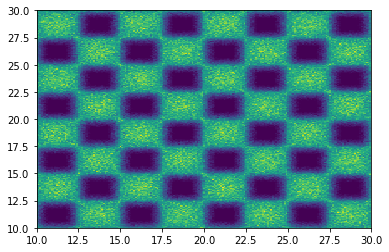

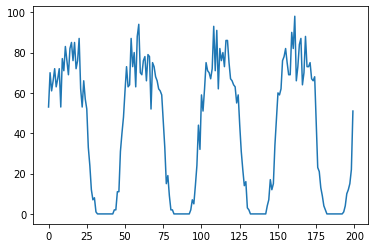

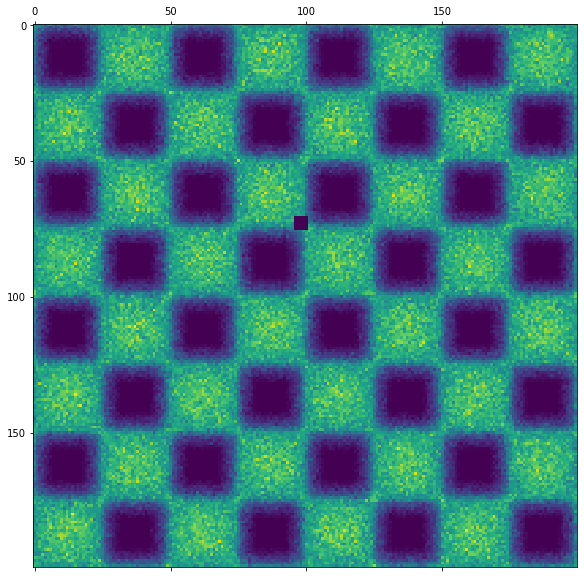

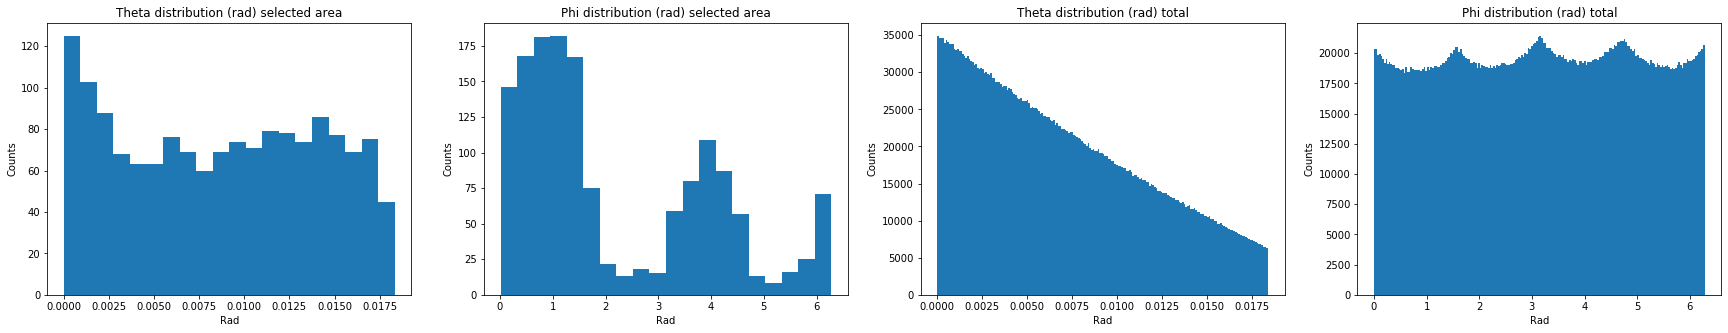

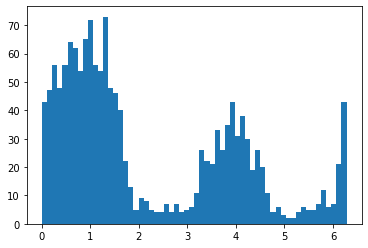

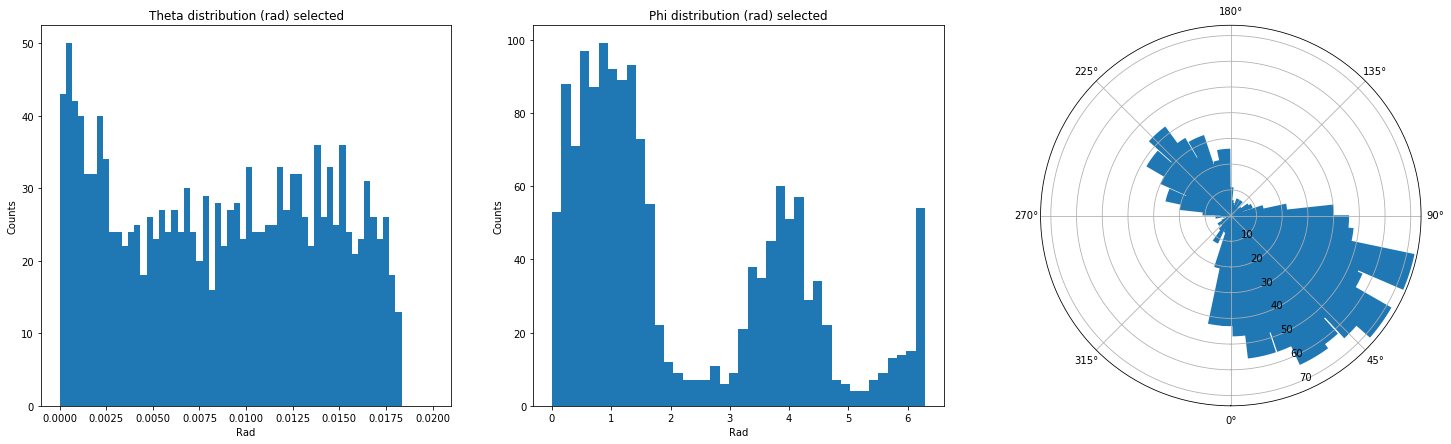

Maximum expected L/D factor:  44.0
Maximum expected angle:  0.022723360841641067
Distribution theta max:  0.01833320756452883
Measured L/D factor:  54.55193925775945
Distribution phi average:  2.180558350318323
Total theta max:  0.018374064359989895
Total measured L/D factor:  54.43066409748157
Total phi average:  3.1581773699601445


In [5]:
IndexX = 71
IndexY = 96
bonus = 5
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP,col_D,col_L)

In [6]:
IndexX = 75
IndexY = 112
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)

TypeError: histogram() missing 2 required positional arguments: 'col_D' and 'col_L'

In [ ]:
IndexX = 87
IndexY = 112
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)

In [ ]:
IndexX = 100
IndexY = 112
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)

In [ ]:
IndexX = 87
IndexY = 100
bonus = 1
histogram (IndexX,IndexY,PosXX,PosYY,bonus,AnT,AnP)

In [ ]:
def randomangle_function(alpha,point):
    theta = (random.random()*alpha/2)
    phi   = random.random()*2*math.pi
    A = np.sqrt(1+np.tan(point)**2)
    if math.pi/2 < point <= 3*math.pi/2:
        ZX = -np.arctan(np.tan(alpha)/A)
        ZY = -np.arctan(np.tan(alpha)*np.tan(point)/A)
    else:
        ZX = np.arctan(np.tan(alpha)/A)
        ZY = np.arctan(np.tan(alpha)*np.tan(point)/A)
    return(ZX,ZY,theta)

In [ ]:
ZAX,ZAY = np.zeros(1000),np.zeros(1000)
LD = 27.2
alpha = 2*np.arctan(1/LD)
for i in range(1000):
    point = math.pi*2 * i / 1000 
    ZAX[i],ZAY[i],theta = randomangle_function(alpha,point)
fig , (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(ZAX)
ax1.set_title("X distribution")
ax1.set_xlabel("Rad")
ax1.set_ylabel("Counts")
ax2.plot(ZAY)
ax2.set_title("Y distribution")
ax2.set_xlabel("Rad")
ax2.set_ylabel("Counts")

(200, 200)
Entering loop
Ith iteration number: 0
Ith iteration number: 1
Ith iteration number: 2
Ith iteration number: 3
Ith iteration number: 4
Ith iteration number: 5
Ith iteration number: 6
Ith iteration number: 7
Ith iteration number: 8
Ith iteration number: 9
Ith iteration number: 10
Ith iteration number: 11
Ith iteration number: 12
Ith iteration number: 13
Ith iteration number: 14
Ith iteration number: 15
Ith iteration number: 16
Ith iteration number: 17
Ith iteration number: 18
Ith iteration number: 19
Ith iteration number: 20
Ith iteration number: 21
Ith iteration number: 22
Ith iteration number: 23
Ith iteration number: 24
Ith iteration number: 25
Ith iteration number: 26
Ith iteration number: 27
Ith iteration number: 28
Ith iteration number: 29
Ith iteration number: 30
Ith iteration number: 31
Ith iteration number: 32
Ith iteration number: 33
Ith iteration number: 34
Ith iteration number: 35
Ith iteration number: 36
Ith iteration number: 37
Ith iteration number: 38
Ith iterat

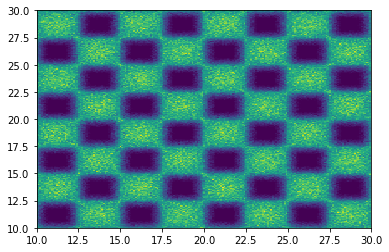

In [7]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[10,30],[10,30]])
hist_resh = np.reshape(np.array(hist.tolist()).astype(np.float),[200,200])
print(hist_resh.shape)
IndexX = 100
IndexY = 112
bonus = 1
#Monkey control:
if bonus == 0:
    bonus = 1
Distribution_theta_dynamic = []
Distribution_phi_dynamic = []
#blank = np.zeros([300,300])
print("Entering loop")
for i in range(50):
    for j in range(50):
        #blank[j:j+200,i:i+200]+=hist_resh
        bonusX = i
        bonusY = j
        indices_X = [idx for idx,val in enumerate(PosXX) if xax[IndexX]< val - bonusX <= xax[IndexX+bonus]]
        indices_Y = [idx for idx,val in enumerate(PosYY) if yax[IndexY]< val - bonusY <= yax[IndexY+bonus]]
        set_IndicesX = set(indices_X)
        set_IndicesY = set(indices_Y)
        common = []
        if set_IndicesX & set_IndicesY:
            common = set_IndicesX & set_IndicesY
        count = 0
        for elem in common:
            Distribution_theta_dynamic.append(AnT[elem])
            Distribution_phi_dynamic.append(AnP[elem])
            count+=1
    print("Ith iteration number: "+str(i))
#fig = plt.figure(figsize=(14,10))
#mat = fig.add_subplot(111)
#tax = mat.matshow(blank)
#plt.imshow(tax)
#fig.colorbar(tax)
#plt.show()
#plt.close()
#plt.plot(blank[150][90:210])

In [ ]:
hist,xax,yax,image = plt.hist2d(PosXX,PosYY,bins=200,range=[[10,30],[10,30]])
plt.show()
plt.close()
hist_resh = np.reshape(np.array(hist.tolist()).astype(np.float),[200,200])
print(hist_resh.shape)
#Monkey control:
if bonus == 0:
    bonus = 1
bonus = 1

blank = np.zeros([250,250])
print("Entering loop")
for i in range(50):
    for j in range(50):
        blank[j:j+200,i:i+200]+=hist_resh
'''
fig = plt.figure(figsize=(14,10))
mat = fig.add_subplot(111)
tax = mat.matshow(blank)
plt.imshow(tax)
fig.colorbar(tax)
plt.show()
plt.close()
'''
plt.plot(blank[125][50:100])
plt.show()
plt.close()
print(np.average(blank[125][50:100]))
print(np.std(blank[125][50:100]))

27
26556
26556


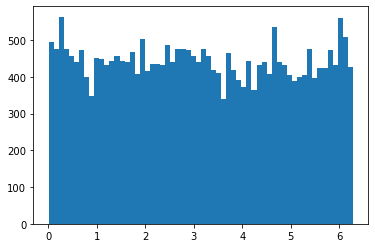

<ipython-input-2-1c0b9f598935>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


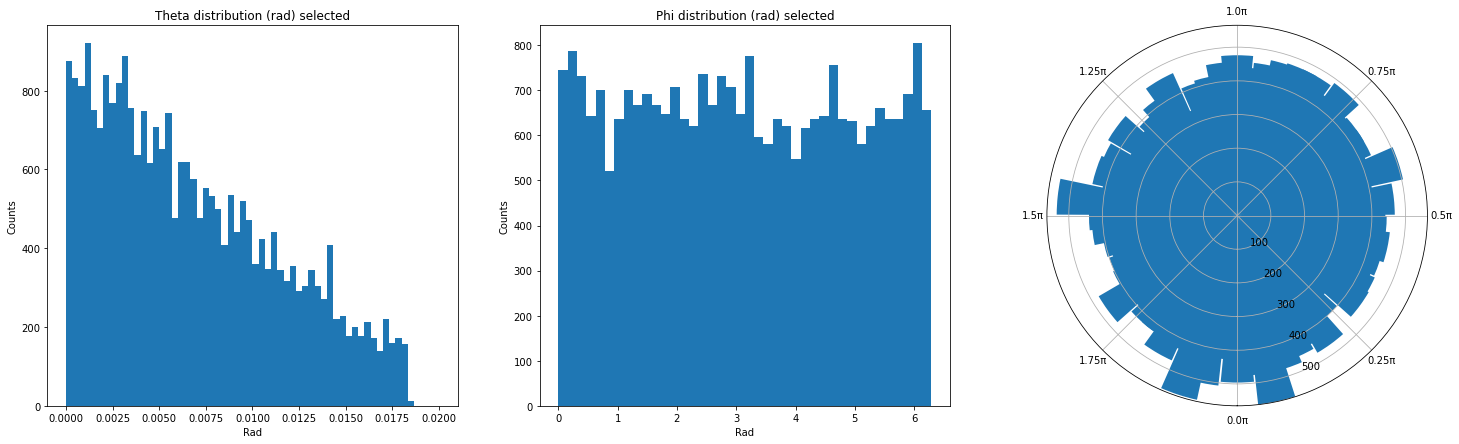

In [3]:
IndexX = 92
IndexY = 120

Distribution_phi_dynamic = []
Distribution_theta_dynamic = []
iterationPhi = []
iterationTheta = []

for chance in os.listdir("ResultsPavia/"):
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Phi" in chance:
        iterationPhi.append(chance)
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Theta" in chance:
        iterationTheta.append(chance)

print(len(iterationPhi))

for elem in iterationPhi:
    titlePhi = "ResultsPavia/"+elem
    
    with open(titlePhi, 'r') as file:
        AnPhi = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnPhi:
        Distribution_phi_dynamic.append(element)

for elem in iterationTheta:
    titleTheta = "ResultsPavia/"+elem
    
    with open(titleTheta, 'r') as file:
        AnTheta = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnTheta:
        Distribution_theta_dynamic.append(element)
    
print(len(Distribution_phi_dynamic))
print(len(Distribution_theta_dynamic))

values,bins,patches = plt.hist(Distribution_phi_dynamic,60)
plt.show()
plt.close()
fig2 = plt.figure()
fig2.set_figheight(7)
fig2.set_figwidth(25)
ay1 = plt.subplot(1,3,2)
ay1.hist(Distribution_phi_dynamic,40,range=[0,6.29])
ay1.set_title("Phi distribution (rad) selected")
ay1.set_xlabel("Rad")
ay1.set_ylabel("Counts")
ay2 = plt.subplot(1,3,1)
ay2.hist(Distribution_theta_dynamic,bins=60,range=[0,0.02])
ay2.set_title("Theta distribution (rad) selected")
ay2.set_xlabel("Rad")
ay2.set_ylabel("Counts")
ay3 = plt.subplot(133,projection="polar")
ay3.bar(bins[:60],values,width=0.2,bottom=0.0,align="center")
ay3.set_ylim([0,np.max(values)+1])
ay3.set_theta_offset(3*math.pi/2)
convert_polar_xticks_to_radians(ay3)
plt.show()
plt.close()

25
15385
15385


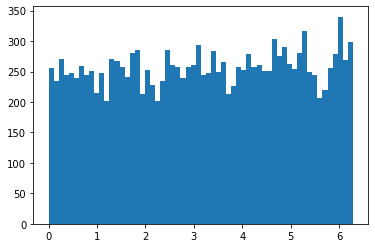

<ipython-input-2-1c0b9f598935>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


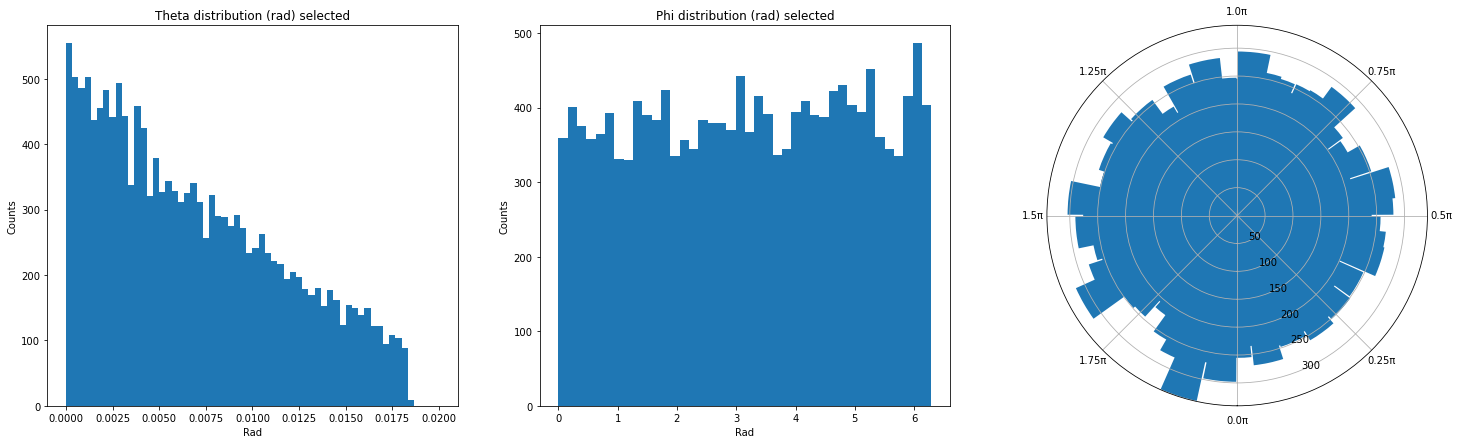

In [4]:
IndexX = 87
IndexY = 100

Distribution_phi_dynamic2 = []
Distribution_theta_dynamic2 = []
iterationPhi2 = []
iterationTheta2 = []

for chance in os.listdir("ResultsPavia_pre/"):
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Phi" in chance:
        iterationPhi2.append(chance)
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Theta" in chance:
        iterationTheta2.append(chance)

print(len(iterationPhi2))

for elem in iterationPhi2:
    titlePhi = "ResultsPavia_pre/"+elem
    
    with open(titlePhi, 'r') as file:
        AnPhi2 = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnPhi2:
        Distribution_phi_dynamic2.append(element)

for elem in iterationTheta2:
    titleTheta = "ResultsPavia_pre/"+elem
    
    with open(titleTheta, 'r') as file:
        AnTheta2 = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnTheta2:
        Distribution_theta_dynamic2.append(element)
    
print(len(Distribution_phi_dynamic2))
print(len(Distribution_theta_dynamic2))

values2,bins2,patches2 = plt.hist(Distribution_phi_dynamic2,60)
plt.show()
plt.close()
fig2 = plt.figure()
fig2.set_figheight(7)
fig2.set_figwidth(25)
ay1 = plt.subplot(1,3,2)
ay1.hist(Distribution_phi_dynamic2,40,range=[0,6.29])
ay1.set_title("Phi distribution (rad) selected")
ay1.set_xlabel("Rad")
ay1.set_ylabel("Counts")
ay2 = plt.subplot(1,3,1)
ay2.hist(Distribution_theta_dynamic2,bins=60,range=[0,0.02])
ay2.set_title("Theta distribution (rad) selected")
ay2.set_xlabel("Rad")
ay2.set_ylabel("Counts")
ay3 = plt.subplot(133,projection="polar")
ay3.bar(bins[:60],values2,width=0.2,bottom=0.0,align="center")
ay3.set_ylim([0,np.max(values2)+1])
ay3.set_theta_offset(3*math.pi/2)
convert_polar_xticks_to_radians(ay3)
plt.show()
plt.close()

26
10648
10648


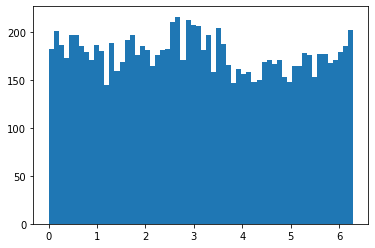

<ipython-input-2-1c0b9f598935>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


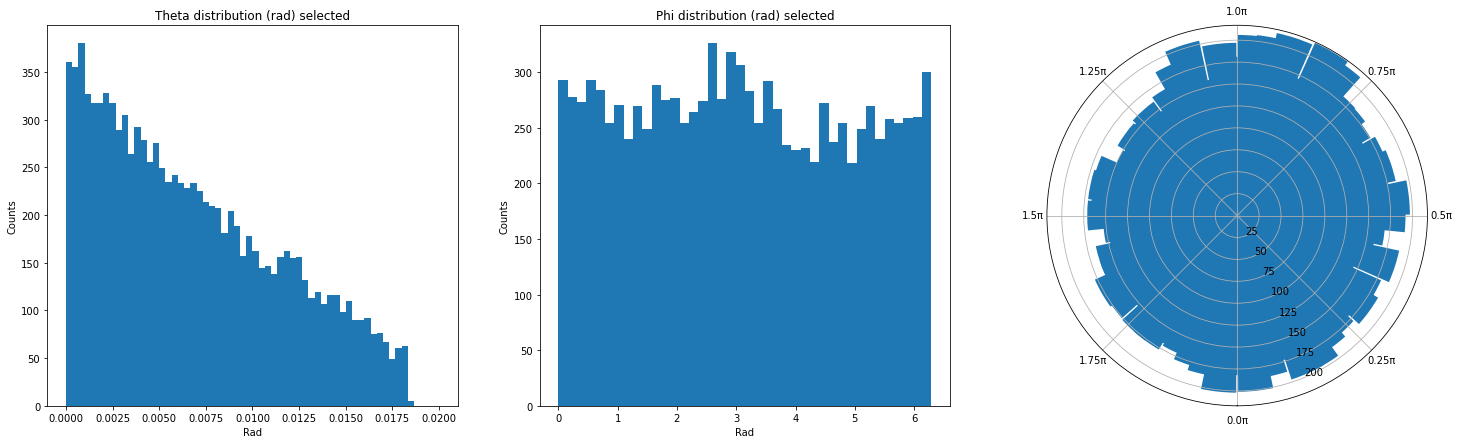

In [5]:
IndexX = 75
IndexY = 112

Distribution_phi_dynamic3 = []
Distribution_theta_dynamic3 = []
iterationPhi3 = []
iterationTheta3 = []

for chance in os.listdir("ResultsPavia_pre/"):
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Phi" in chance:
        iterationPhi3.append(chance)
    if "Points-X"+str(IndexX)+"Y"+str(IndexY)+"Theta" in chance:
        iterationTheta3.append(chance)

print(len(iterationPhi3))

for elem in iterationPhi3:
    titlePhi = "ResultsPavia_pre/"+elem
    
    with open(titlePhi, 'r') as file:
        AnPhi3 = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnPhi3:
        Distribution_phi_dynamic3.append(element)

for elem in iterationTheta3:
    titleTheta = "ResultsPavia_pre/"+elem
    
    with open(titleTheta, 'r') as file:
        AnTheta3 = np.array(eval(file.read())) # read list string and convert to array
    file.close()
    for element in AnTheta3:
        Distribution_theta_dynamic3.append(element)
    
print(len(Distribution_phi_dynamic3))
print(len(Distribution_theta_dynamic3))

values3,bins3,patches3 = plt.hist(Distribution_phi_dynamic3,60)
plt.show()
plt.close()
fig2 = plt.figure()
fig2.set_figheight(7)
fig2.set_figwidth(25)
ay1 = plt.subplot(1,3,2)
ay1.hist(Distribution_phi_dynamic3,40,range=[0,6.29])
ay1.set_title("Phi distribution (rad) selected")
ay1.set_xlabel("Rad")
ay1.set_ylabel("Counts")
ay2 = plt.subplot(1,3,1)
ay2.hist(Distribution_theta_dynamic3,bins=60,range=[0,0.02])
ay2.set_title("Theta distribution (rad) selected")
ay2.set_xlabel("Rad")
ay2.set_ylabel("Counts")
ay3 = plt.subplot(133,projection="polar")
ay3.bar(bins[:60],values3,width=0.2,bottom=0.0,align="center")
ay3.set_ylim([0,np.max(values3)+1])
ay3.set_theta_offset(3*math.pi/2)
convert_polar_xticks_to_radians(ay3)
plt.show()
plt.close()

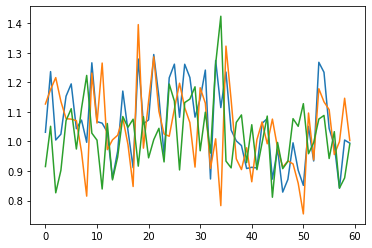

1.058601682170437
1.0449945119332364
1.0193391955645639


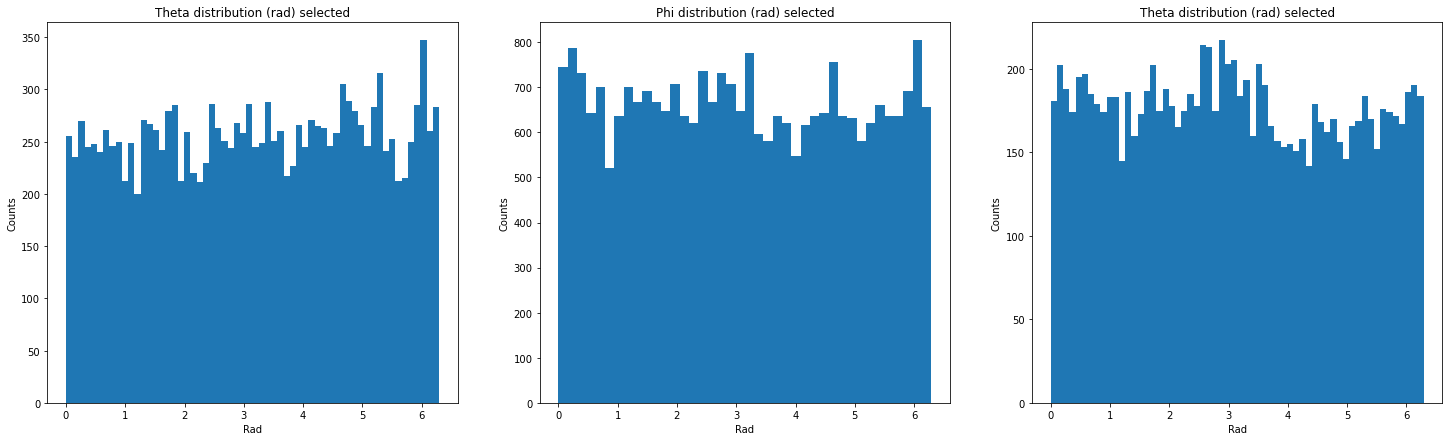

In [6]:
division1  = np.zeros(len(values))
division2 = np.zeros(len(values))
division3 = np.zeros(len(values))
for i in range(len(values)):
    values[i] = values[i]/sum(values)
for i in range(len(values)):
    values2[i] = values2[i]/sum(values2)
for i in range(len(values)):
    values3[i] = values3[i]/sum(values3)
for i in range(len(values)):
    division1[i] = values3[i] / values2[i]
    division2[i] = values[i] / values2[i]
    division3[i] = values3[i] / values[i]
plt.plot(division1)
plt.plot(division2)
plt.plot(division3)
plt.show()
plt.close()
fig2 = plt.figure()
fig2.set_figheight(7)
fig2.set_figwidth(25)
ay1 = plt.subplot(1,3,2)
ay1.hist(Distribution_phi_dynamic,40,range=[0,6.29])
ay1.set_title("Phi distribution (rad) selected")
ay1.set_xlabel("Rad")
ay1.set_ylabel("Counts")
ay2 = plt.subplot(1,3,1)
ay2.hist(Distribution_phi_dynamic2,bins=60,range=[0,6.29])
ay2.set_title("Theta distribution (rad) selected")
ay2.set_xlabel("Rad")
ay2.set_ylabel("Counts")
ay3 = plt.subplot(1,3,3)
ay3.hist(Distribution_phi_dynamic3,bins=60,range=[0,6.29])
ay3.set_title("Theta distribution (rad) selected")
ay3.set_xlabel("Rad")
ay3.set_ylabel("Counts")
print(np.average(division1))
print(np.average(division2))
print(np.average(division3))


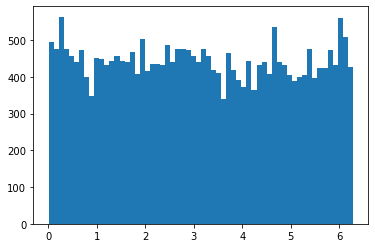

<ipython-input-2-1c0b9f598935>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


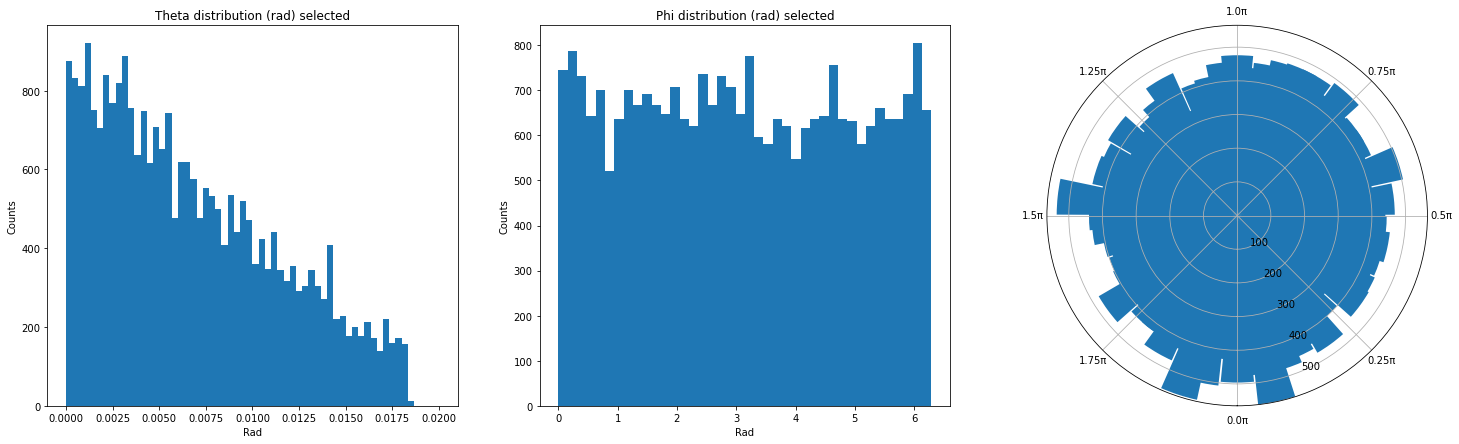

10 % at angle  0.0012251141434169233  LD  816.250065409686  with  3184.0  elements
20 % at angle  0.002143589858821374  LD  466.50643742558407  with  2132.0  elements
30 % at angle  0.0033682241460273083  LD  296.89123258972074  with  2972.0  elements
40 % at angle  0.004592858433233242  LD  217.72780134148744  with  2540.0  elements
50 % at angle  0.005817492720439176  LD  171.89341988986712  with  2496.0  elements
60 % at angle  0.007654444151248077  LD  130.64050765709874  with  3048.0  elements
70 % at angle  0.009491395582056979  LD  105.35542031844942  with  2692.0  elements
80 % at angle  0.011328347012865881  LD  88.2703558912577  with  2296.0  elements
90 % at angle  0.014083774159079233  LD  70.99900000286542  with  2656.0  elements
100 % at angle  0.0183699941643  LD  54.43047520671622  with  2540.0  elements
Maximum expected L/D factor:  44.0
Maximum expected angle:  0.022723360841641067
Distribution theta max:  0.0183699941643
Measured L/D factor:  54.4427214563224
Distrib

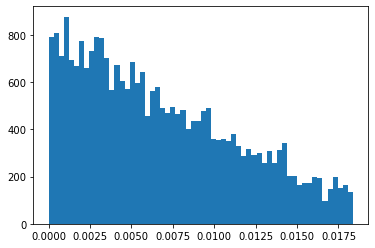

In [24]:
values,bins,patches = plt.hist(Distribution_phi_dynamic,60)
plt.show()
plt.close()
fig2 = plt.figure()
fig2.set_figheight(7)
fig2.set_figwidth(25)
ay1 = plt.subplot(1,3,2)
ay1.hist(Distribution_phi_dynamic,40,range=[0,6.29])
ay1.set_title("Phi distribution (rad) selected")
ay1.set_xlabel("Rad")
ay1.set_ylabel("Counts")
ay2 = plt.subplot(1,3,1)
ay2.hist(Distribution_theta_dynamic,bins=60,range=[0,0.02])
ay2.set_title("Theta distribution (rad) selected")
ay2.set_xlabel("Rad")
ay2.set_ylabel("Counts")
ay3 = plt.subplot(133,projection="polar")
ay3.bar(bins[:60],values,width=0.2,bottom=0.0,align="center")
ay3.set_ylim([0,np.max(values)+1])
ay3.set_theta_offset(3*math.pi/2)
convert_polar_xticks_to_radians(ay3)
plt.show()
plt.close()
values,bins,patches = plt.hist(Distribution_theta_dynamic,60)
i,count,add = 0,1,0
indexes = []
while i < len(values):
    add += values[i]/sum(values)
    i += 1
    if count*0.1 <= add:
        indexes.append(i)
        count+=1
i,value = 0,0
for index in indexes:
    i+=1
    print(i*10,"% at angle ",bins[index]," LD ",1/np.tan(bins[index])," with ",sum(values[value:index])," elements")
    value = index
print("Maximum expected L/D factor: ",col_L/col_D)
print("Maximum expected angle: ",np.arctan(col_D/col_L))
print("Distribution theta max: ",np.max(Distribution_theta_dynamic))
print("Measured L/D factor: ",1/np.arctan(np.max(Distribution_theta_dynamic)))
print("Distribution phi average: ",np.average(Distribution_phi_dynamic))
print("Total theta max: ",np.max(AnTheta))
print("Total measured L/D factor: ",1/np.arctan(np.max(AnTheta)))
print("Total phi average: ",np.average(AnPhi))

In [7]:
print(os.getcwd())

/eos/home-o/osanspla/SWAN_projects/Neutron Collimator Geometry


(250, 250)
geometrical LD:  106.06601717798212
max LD 212.13203435596424
circular LD:  150.0
theorized LD:  150.0
average LD:  142.83716505668195


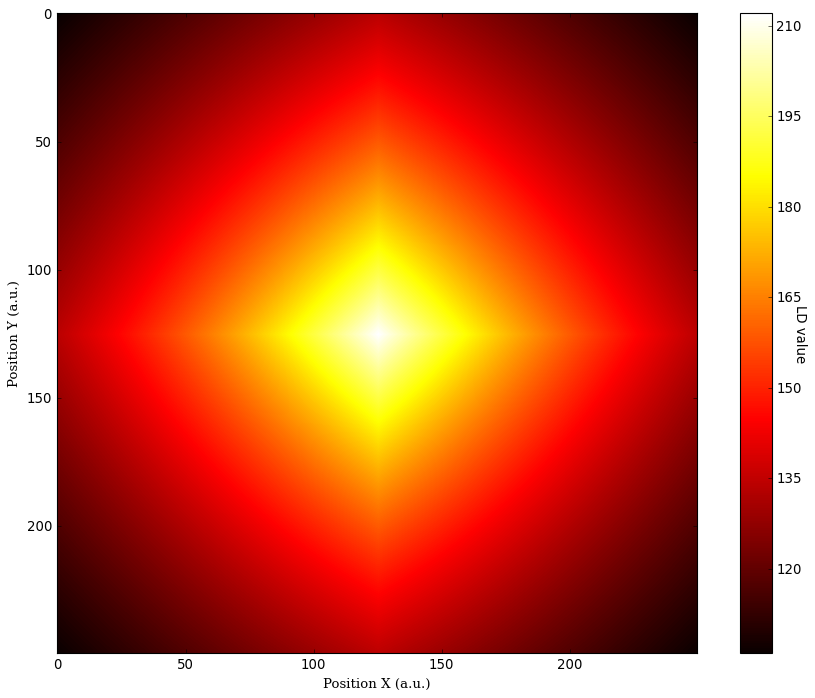

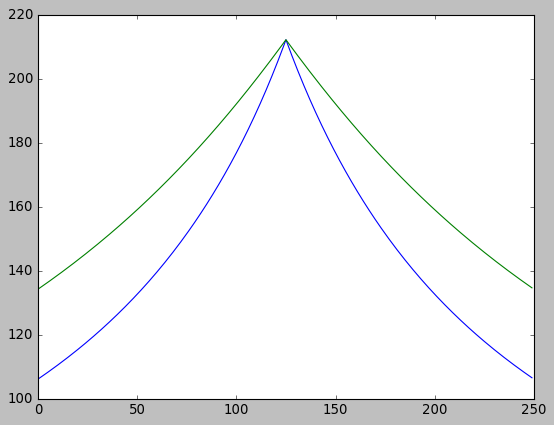

10 % at angle  119.3242693252299  LD  -17.758545722078818  with  6449.0  elements
20 % at angle  125.68823035590883  LD  40.76785423471046  with  6648.0  elements
30 % at angle  130.46120112891802  LD  -0.08531207717189178  with  6040.0  elements
40 % at angle  134.7038418160373  LD  -2.470321345194462  with  6114.0  elements
50 % at angle  139.47681258904652  LD  0.3359019171084708  with  6480.0  elements
60 % at angle  144.7801134479456  LD  3.6580286064439584  with  6076.0  elements
70 % at angle  151.14407447862453  LD  2.75982553300628  with  5984.0  elements
80 % at angle  160.15968593875303  LD  -16.229235377086106  with  6452.0  elements
90 % at angle  172.8876080001109  LD  9.965435275675  with  6176.0  elements


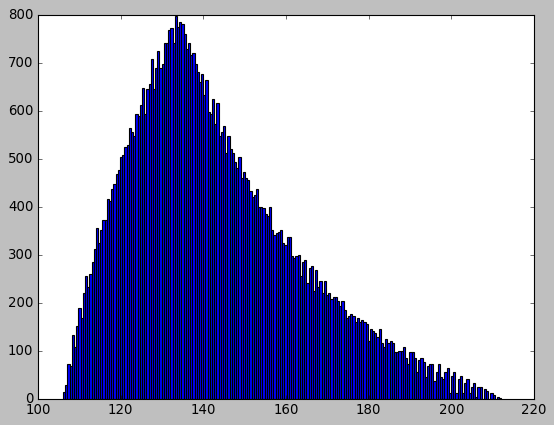

In [5]:
col_L = 12000
col_D = 80
Xcoord = []
Ycoord = []
coord = []
iteration = 250
LDvalue = np.zeros([iteration,iteration])
angles = []
diagonal = np.zeros(iteration)
print(LDvalue.shape)
potentialD = np.zeros(4)
for x in range(iteration):
    for y in range(iteration):
        Xvalue = col_D*x/iteration
        Yvalue = col_D*y/iteration
        coord.append([Xvalue,Yvalue])
        potentialD[0] = np.sqrt(Xvalue**2+Yvalue**2)
        potentialD[1] = np.sqrt((Xvalue-col_D)**2+Yvalue**2)
        potentialD[2] = np.sqrt((Xvalue-col_D)**2+(Yvalue-col_D)**2)
        potentialD[3] = np.sqrt((Xvalue)**2+(Yvalue-col_D)**2)
        LDvalue[x][y]=col_L/np.max(potentialD)
        angles.append(np.arctan(np.max(potentialD)/col_L))
for i in range(iteration):
    diagonal[i] = LDvalue[i][i]
print("geometrical LD: ",np.min(LDvalue))
print("max LD",np.max(LDvalue))
print("circular LD: ",np.min(LDvalue)*np.sqrt(2))
print("theorized LD: ",col_L/col_D)
print("average LD: ",np.average(LDvalue))

fig = plt.figure(figsize=(14,10))
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.imshow(LDvalue,cmap="hot",vmin=np.min(LDvalue),vmax=np.max(LDvalue))
plt.xlabel("Position X (a.u.)",fontname="serif")
plt.ylabel("Position Y (a.u.)",fontname="serif")
cbar = plt.colorbar()
cbar.set_label("LD value",rotation=270)
file_path = "/eos/home-o/osanspla/SWAN_projects/Thesis/"
file_name = "max-"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()


plt.plot(diagonal)
plt.plot(LDvalue[int(iteration/2)][:])
plt.show()
plt.close()
for element in range(len(angles)):
    angles[element] = 1/np.tan(angles[element])
values,bins,patches=plt.hist(angles,bins=200)

i,count,add = 0,1,0
indexes = []
while i < len(values):
    add += values[i]/sum(values)
    i += 1
    if count*0.1 <= add:
        indexes.append(i)
        count+=1
i,value = 0,0
for index in indexes:
    i+=1
    print(i*10,"% at angle ",bins[index]," LD ",1/np.tan(bins[index])," with ",sum(values[value:index])," elements")
    value = index
plt.show()
plt.close()

(1000, 1000)
minimum angle:  62.22539674441618
geometrical LD:  31.11269837220809
circular LD:  44.0
theorized LD:  44.0
average LD:  41.89885125980299


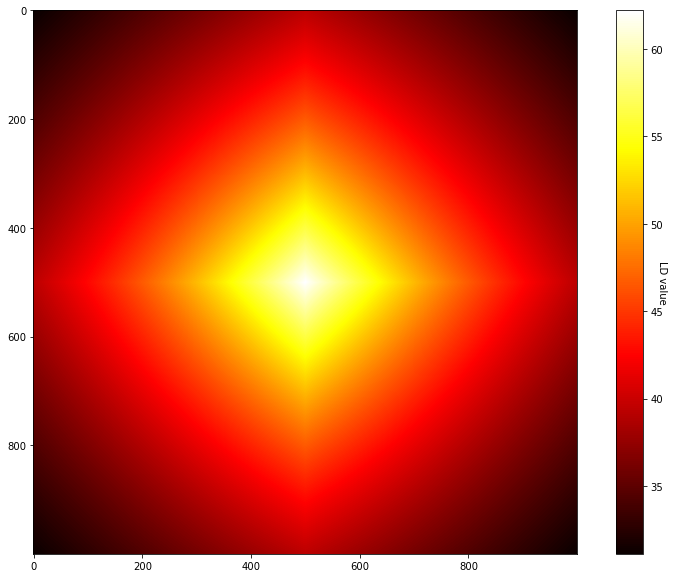

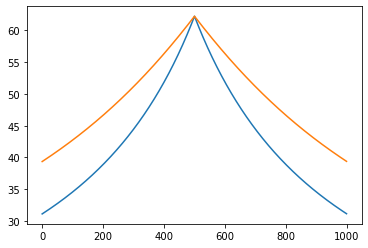

10 % at angle  0.019843544145657768  LD  50.38760887672957  with  104177.0  elements
20 % at angle  0.02136933257934706  LD  46.788910019923364  with  98080.0  elements
30 % at angle  0.022573902395417553  LD  44.291417423498835  with  99208.0  elements
40 % at angle  0.023617862902678644  LD  42.33296055288791  with  101324.0  elements
50 % at angle  0.024581518755535037  LD  40.672774729966655  with  105968.0  elements
60 % at angle  0.02538456529958203  LD  39.385555234895214  with  97412.0  elements
70 % at angle  0.026187611843629027  LD  38.17726482709169  with  94166.0  elements
80 % at angle  0.027231572350890118  LD  36.713003153807584  with  100380.0  elements
90 % at angle  0.02867705613017471  LD  34.861523299873824  with  102628.0  elements


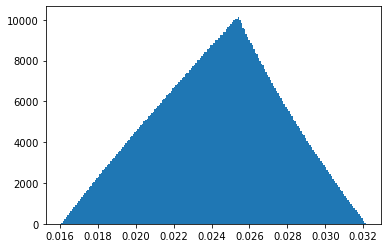

In [3]:
col_L = 110
col_D = 2.5
Xcoord = []
Ycoord = []
coord = []
iteration = 1000
LDvalue = np.zeros([iteration,iteration])
angles = []
diagonal = np.zeros(iteration)
print(LDvalue.shape)
potentialD = np.zeros(4)
for x in range(iteration):
    for y in range(iteration):
        Xvalue = col_D*x/iteration
        Yvalue = col_D*y/iteration
        coord.append([Xvalue,Yvalue])
        potentialD[0] = np.sqrt(Xvalue**2+Yvalue**2)
        potentialD[1] = np.sqrt((Xvalue-col_D)**2+Yvalue**2)
        potentialD[2] = np.sqrt((Xvalue-col_D)**2+(Yvalue-col_D)**2)
        potentialD[3] = np.sqrt((Xvalue)**2+(Yvalue-col_D)**2)
        LDvalue[x][y]=col_L/np.max(potentialD)
        angles.append(np.arctan(np.max(potentialD)/col_L))
for i in range(iteration):
    diagonal[i] = LDvalue[i][i]
print("minimum angle: ",np.max(LDvalue))
print("geometrical LD: ",np.min(LDvalue))
print("circular LD: ",np.min(LDvalue)*np.sqrt(2))
print("theorized LD: ",col_L/col_D)
print("average LD: ",np.average(LDvalue))
plt.figure(figsize=(14,10))
plt.imshow(LDvalue,cmap="hot",vmin=np.min(LDvalue),vmax=np.max(LDvalue))
cbar = plt.colorbar()
cbar.set_label("LD value",rotation=270)
plt.show()
plt.close()
plt.plot(diagonal)
plt.plot(LDvalue[int(iteration/2)][:])
plt.show()
plt.close()
values,bins,patches=plt.hist(angles,bins=200)
i,count,add = 0,1,0
indexes = []
while i < len(values):
    add += values[i]/sum(values)
    i += 1
    if count*0.1 <= add:
        indexes.append(i)
        count+=1
i,value = 0,0
for index in indexes:
    i+=1
    print(i*10,"% at angle ",bins[index]," LD ",1/np.tan(bins[index])," with ",sum(values[value:index])," elements")
    value = index
plt.show()
plt.close()

Theta-0.txt
Theta-1.txt
Theta-2.txt
Theta-3.txt
Theta-4.txt
Theta-5.txt
Theta-6.txt
Theta-7.txt
Theta-8.txt
Theta-9.txt
Theta-10.txt
Theta-11.txt
Theta-12.txt
Theta-13.txt
Theta-14.txt
Theta-15.txt
Theta-16.txt
Theta-17.txt
Theta-18.txt
Theta-19.txt
Theta-20.txt
Theta-21.txt
Theta-22.txt
Theta-23.txt
Theta-24.txt
Theta-25.txt
Theta-26.txt
Theta-27.txt
Theta-28.txt
Theta-29.txt
Theta-30.txt
Theta-31.txt
Theta-32.txt
Theta-33.txt
Theta-34.txt
Theta-35.txt
Theta-36.txt
Theta-37.txt
Theta-38.txt
Theta-39.txt
Theta-40.txt
Theta-41.txt
Theta-42.txt
Theta-43.txt
Theta-44.txt
Theta-45.txt
Theta-46.txt
Theta-47.txt
Theta-48.txt
Theta-49.txt
Theta-50.txt
Theta-51.txt


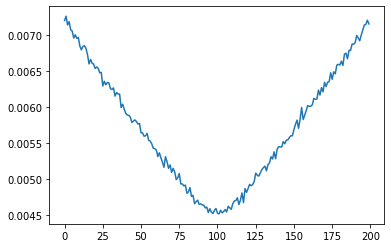

In [2]:
thetafinal = np.zeros(200)
for i in range(52):    
    title = "Theta-"+str(i)+".txt"
    print(title)
    with open(title, 'r') as file:
        thetangle = np.array(eval(file.read())) # read list string and convert to array
        file.close()
    for j in range(200):
        thetafinal[j] += thetangle[j]
    
plt.plot(thetafinal/(i+1))
plt.show()
plt.close()

In [3]:
coordinate = 40
print(1/np.tan(thetafinal[100-coordinate]/(i+1)),1/np.tan(thetafinal[100+coordinate]/(i+1)),i+1)
print(1/np.tan(np.min(thetafinal)/(i+1)))

184.9175141225837 183.36594436000965 52
221.16685703243056


In [8]:
(np.arctan(1/41.89))*360/(2*math.pi)

1.3675077448172452